Importing the *necessary* python modules.

In [1]:
import os
from math import log
from makimono import toolbox
from makimono import plotter
import numpy as np
%matplotlib inline

Setting *plotting parameters* and paths to *target* (transcripts of interest) and expression *data* files.

In [2]:
tp = [0, 0.5, 2, 4, 8, 12, 24, 48]

bkticks=[0.5, 2, 4, 8, 12, 24, 48]
mplticks = ['0h', '30min', '2h', '4h', '8h', '12h', '24h', '48h']

directory = os.path.expanduser("~/SampleData/clusters/")
f = "026_{30min}GT{2h}GT{4h=8h=12h=24h=48h}GT{0h}.txt"

expression = os.path.expanduser("~/SampleData/expression/sample-expressions.tsv")
n = 2 # number of replicates in expression file

Conflating the *replicates* (using the mean) for each time point observation on the sample data.

In [3]:
data = {}
with open(expression) as fh:
    for line in fh:
        token = line.split("\t")
        token = [token[0]] + [int(x.strip()) for x in token[1:]]
        conf = []
        for i in range(1, len(token)-1, n):
            conf.append( (token[i] + token[i+1])/float(n) )        
        data[token[0]] = conf        

Reading target file for **Cre transcripts of interests** and respective ** functional annotations** (if available) and subsetting the conflated expression counts of interest.

In [4]:
annotDict = toolbox.read_annotation_file(directory, f)
subset = {k: data[k] for k in annotDict.keys()}

Creating a (log-y) **matlibplot** of the set of interest expression data.

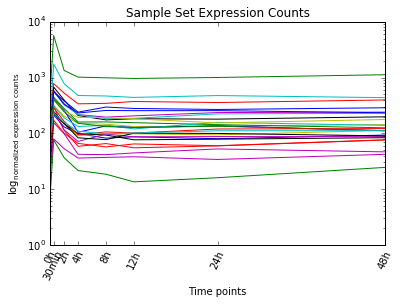

In [5]:
mlp = plotter.Mlplot(tp, mplticks)

mlp.plot_mpl_figure(subset, name="Sample Set Expression Counts")

Creating a Blur **bokeh** plot object:

In [6]:
bkp = plotter.Blur(tp, bkticks)

Transforming the expression count means with **logarithm**.

In [7]:
subsetlog = {}
for key in subset:
    for v in subset[key]:
        subsetlog.setdefault(key, []).append(log(v))

Handling the **enrichment data** (created by *topGO* and *GOstats* -- optionaly via **makimono** *enricher* module).  
(NOTE: Currently relies on enrichment result files to be placed under the *goenrich*[/BP, /MF and /CC] and  
*keggenrich* folders located at the same directory as the target files. If the proper files are not found or processed  
enrichment reports will not be added to the interactive plot page).

In [8]:
enriched = toolbox.process_enrichment_values(directory, os.path.splitext(f)[0], 0.05)

Generating an *interactive bokeh plot*, for the expression count data in the set of interest.  

In [9]:
name = os.path.splitext(f)[0]
savelocation = os.path.expanduser("~/SampleData/html") # hmtl file will be created here
mode = "web" # creates smaller files (but dependent on internet connection)

bkp.generate_interactive_bokeh_plot(subsetlog, name, savelocation, annots=annotDict, plus=enriched, portability=mode)